# Project: TMBd Movie Data Analysis
## Prepared by: Ashley Mahaffey

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This report analyzes data from The Movie Database (TMDb) containing information on approximately 10,000 movies. The primary focus is on understanding the factors influencing movie revenue, with a specific examination of budget, genre, and runtime. Additionally, we identify the most popular movie and the one with the highest mean revenue.

The dataset includes various attributes, such as movie title, budget, revenue, genres, and runtime. Columns and descriptions include:
<ul>
<li><b>id:</b> Unique identifier for each row of information.</li>
<li><b>imdb_id:</b> Unique identifier imbd has assigned for each row of information.</li>
<li><b>popularity:</b> A number assigned to the title's place in the movie bank ranking.</li>
<li><b>budget:</b> Money allocated to complete the movie.</li>
<li><b>revenue:</b> Total amount of income generated.</li>
<li><b>original_title:</b> Original title of the movie.</li>
<li><b>cast:</b> Individuals who act in the movie.</li>
<li><b>homepage:</b> The movie's personal website.</li>
<li><b>director:</b> The individual who directed the movie.</li>
<li><b>tagline:</b> The catchy one liner of the movie.</li>
<li><b>keywords:</b> A subset of words that have been voted on IMDb as most relevant to the title.</li>
<li><b>overview:</b> Movie synopsis.</li>
<li><b>runtime:</b> Length of movie.</li>
<li><b>genres:</b> A classification that groups movies with similar themes, styles, subject matter, and narrative elements together based on common characteristics.</li>
<li><b>production_companies:</b> Company that produced the movie.</li>
<li><b>release_date:</b> Date the movie was released.</li>
<li><b>vote_count:</b> The number of voters for each movie.</li>
<li><b>vote_average:</b> The vote average, or rating, for movies on IMDb is a weighted average that aims to represent the general voting population and prevent manipulation by specific groups or individuals.</li>
<li><b>release_year:</b> Year the movie was released.</li>
<li><b>budget_adj:</b> Budget adjusted to account for inflation (since 2010).</li>
<li><b>revenue_adj:</b>  Revenue adjusted to account for inflation (since 2010).</li>
</ul>					


### Question(s) for Analysis
1. What factors are strongly linked to high and low movie revenue, considering budget, genre, and runtime as independent variables with revenue as the dependent variable?
2. What movie was most popular overall?
3. What movie brought in the highest mean revenue overall?

#### Below I have imported statements for all of the packages I will be using in this analysis project.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Below I have loaded in the IMDb movie data using Pandas.

In [3]:
df = pd.read_csv('/Users/ashleymahaffey/Desktop/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next, let's take a look at the number of rows and columns:

In [3]:
df.shape

(10866, 21)

Below we can review statistical details of numberical columns:

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Below I've checked data types and non-null counts to identify missing values.:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

I've decided to remove the following fields becuase they will not have influence on the information I will be analysing:
<ul>
 <li>id</li>
 <li>imdb_id</li>
 <li>tagline</li>
 <li>keywords</li>
 <li>overview</li>
 <li>budget_adj</li>
 <li>revenue_adj</li>
</ul>

In [6]:
df.drop(['id', 'imdb_id', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


Below is a histogram that offers a general snapshot of IMDb's numerical data.

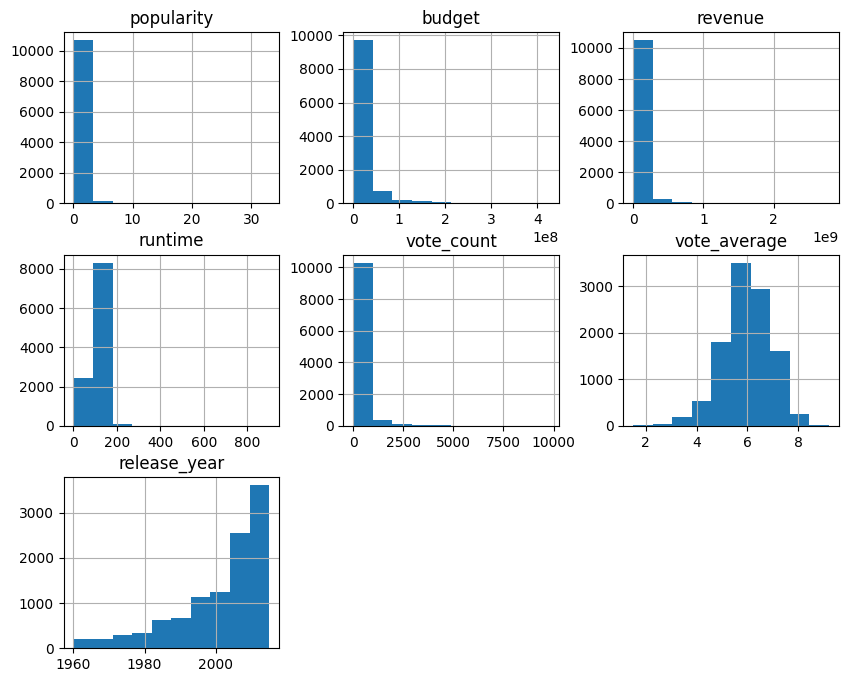

In [7]:
df.hist(figsize=(10, 8));

I am removing all rows of movies that list "0" for revenue and/or budget to ensure data integrity and prevent potential skewing of the analysis: 

In [8]:
# Remove rows with zero or missing values in the 'budget' or 'revenue' fields
filtered_df = df[(df['budget'] > 0) | (df['revenue'] > 0)]
filtered_df = filtered_df[(filtered_df['budget'] > 0) | (filtered_df['revenue'] > 0)]

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What factors are strongly linked to high and low movie revenue, considering budget, genre, and runtime as independent variables with revenue as the dependent variable?

#### Revenue & Budget

I want to see if there is a positive correlation between high budget and high revenue movies. A scatterplot will be the best visual representation to determine this. I've recogized that some fields under "budget" and "revenue" equal zero, in which case I've ensureed the scatterplot only plots those movies that have non zero budgets and non zero revenues:

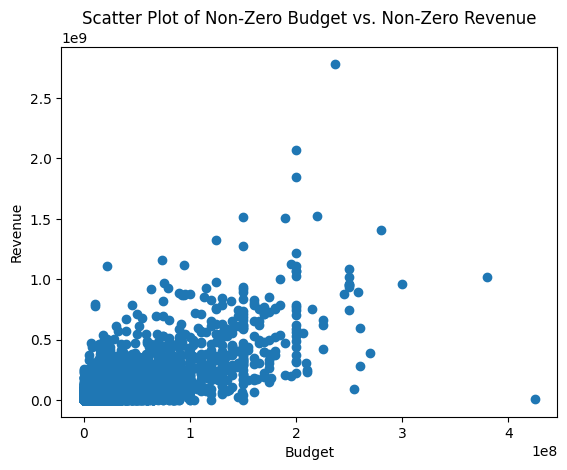

In [10]:
plt.scatter(filtered_df['budget'], filtered_df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Non-Zero Budget vs. Non-Zero Revenue')
plt.show()

There's a negative correlation between budget and revenue, suggesting that a high budget doesn't guarantee high revenue.

#### Revenue & Genre

Next, I would like to explore the relationship between mean revenue and genre. Below I've split genre's up, grouped them, calculated mean revenue, and created a bar graph for a visual. We can see that the "Animation" genre brings in the highest mean revenue, and "TV Movie" brings in the lowest mean revenue. Genre significantly influences mean revenue, with "Animation" movies generating the highest mean revenue, in which the following genre's seem to bring in the most revenue: animation, adventure, fantasy, family, science fiction, and action. There does seem to be a large and noticable drop of mean revenue outside of these genres, specifically: documentary, foreign, and TV movie.

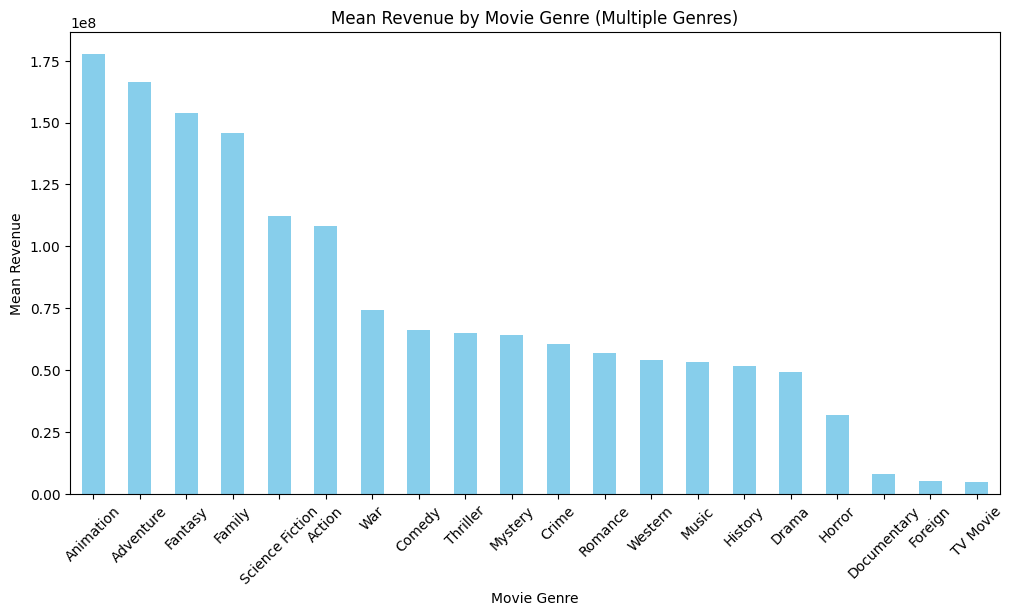

In [11]:
# Split genres and expand rows
filtered_df['genres'] = filtered_df['genres'].str.split('|')
filtered_df = filtered_df.explode('genres')

# Group by genre and calculate mean revenue
genre_revenue = filtered_df.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 6))
genre_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Movie Genre')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Movie Genre (Multiple Genres)')
plt.xticks(rotation=45)
plt.show()

#### Revenue & Runtime

Next, I would like to explore the relationship between mean revenue and runtime, and want to specify the removal of zero budget and revenue fields to keep the data from being skewed. A scatter plot will offer the most insight to into the correlation of this data.

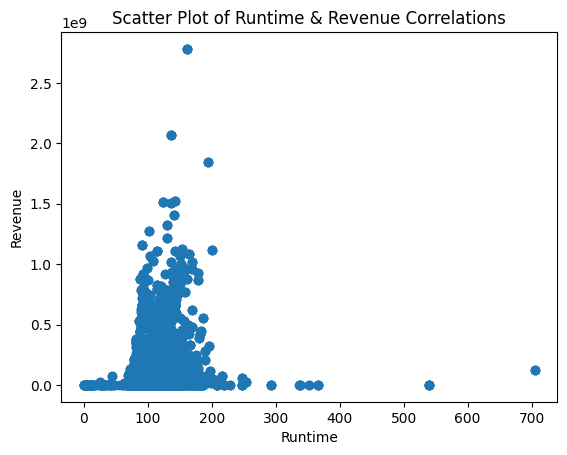

In [12]:
plt.scatter(filtered_df['runtime'], filtered_df['revenue'])
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Runtime & Revenue Correlations')
plt.show()

Most movies are between 100-160 runtime and under low revenue. Extreme runtime values (below 100 or above 200) tend to result in lower revenue. However, this does not indicate causation and we must further investigate to understand the relationship between revenue and runtime. To do so, I would like to explore other features of the movies with a runtime bewtween 100-160 minutes. I would like to start with genre, below:

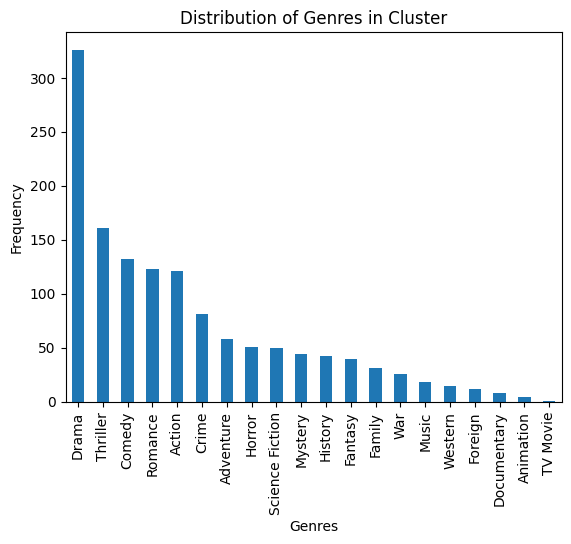

In [13]:
clustered_movies = filtered_df[(filtered_df['runtime'] >= 100) & (filtered_df['runtime'] <= 160) & (filtered_df['revenue'] >= 0) & (filtered_df['revenue'] <= 0.5)]

# Create the bar graph
clustered_movies['genres'].value_counts().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Genres in Cluster')
plt.xticks(rotation=90)
plt.show()

You can see based on this graph, that dramatic movies that are between 100-160 minutes are the most produced. However, we still need to dig deeper to see if there is correlation between runtime, genre, and mean revenue. I've used the bargraph below to put together all my findings based that includes the top five genres for films in the 100-160 minute runtime, alongside mean revenue. In the graph below, we can see that most films are produced and most likely to get the best ROI between 100-160 minute run time while also being genres including animation, adventure, fantasy, family, and science fiction. However, it appears animated films between 100-160 minutes are most likely to bring in higher revenue. 

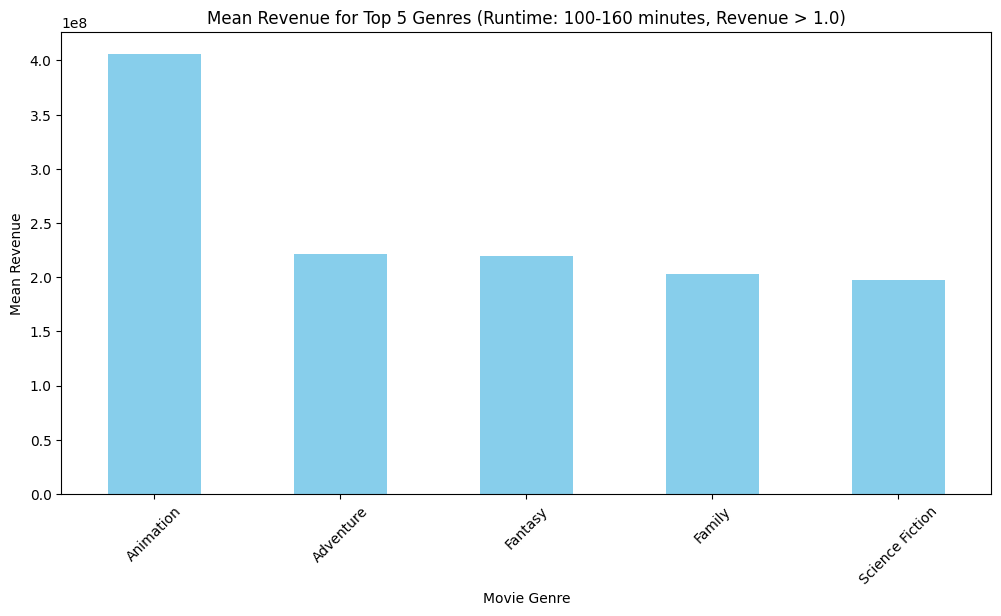

In [34]:
# Filter the data
filtered_df = df[(df['runtime'] >= 100) & (df['runtime'] <= 160) & (df['revenue'] > 1.0)]

# Group by genre and calculate mean revenue
genre_revenue = filtered_df.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(5)

# Create a bar graph for the top 5 genres
plt.figure(figsize=(12, 6))
genre_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Movie Genre')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue for Top 5 Genres (Runtime: 100-160 minutes, Revenue > 1.0)')
plt.xticks(rotation=45)
plt.show()

### 2. What movie is the most popular overall?

Below sorts the data by the popularity column in decsending order:

In [35]:
df_sorted = df.sort_values(by="popularity", ascending=False)

Next we want to narrow down the top 10 movies for perspective:

In [36]:
top_n = 10
top_movies = df_sorted.drop_duplicates(subset="original_title").head(top_n)

Lastly, a bar graph will provide the best visual to answer what movie is the most popular overall:

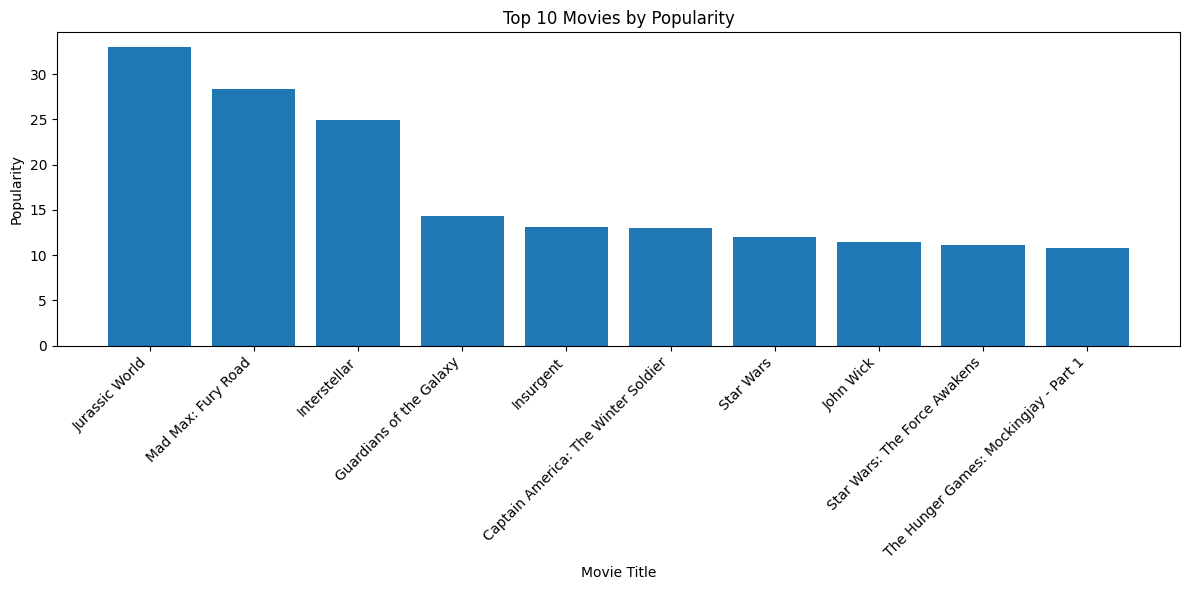

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(top_movies["original_title"], top_movies["popularity"])
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title(f'Top {top_n} Movies by Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

"Jurassic World" is the most popular movie among approximately 10,000 movies in the dataset, closely followed by "Mad Max: Fury Road.

### 3. What movie brought in the highest mean revenue overall?

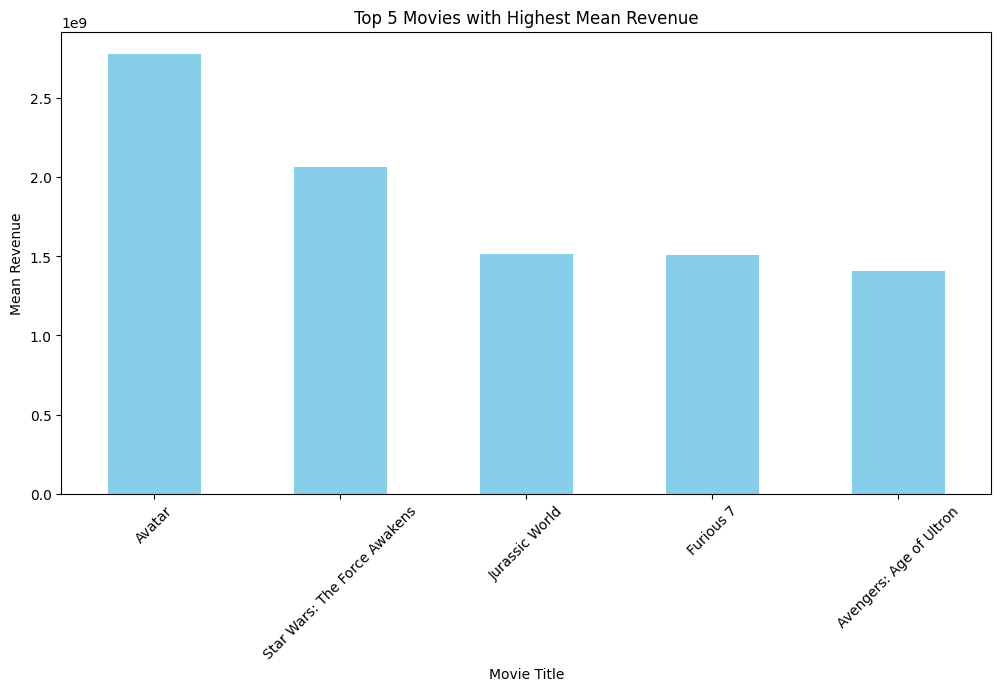

In [4]:
mean_revenue_by_movie = df.groupby('original_title')['revenue'].mean().sort_values(ascending=False)

# Select the top 5 movies with the highest mean revenue
top_5_movies = mean_revenue_by_movie.head(5)

# Create a bar graph for the top 5 highest mean revenue movies
plt.figure(figsize=(12, 6))
top_5_movies.plot(kind='bar', color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Mean Revenue')
plt.title('Top 5 Movies with Highest Mean Revenue')
plt.xticks(rotation=45)
plt.show()

"Avatar" has the highest mean revenue, followed by "Star Wars: The Force Awakens" and "Jurassic World", as shown in the bar graph above.

<a id='conclusions'></a>
## Conclusions
In this analysis of a dataset containing information on approximately 10,000 movies from The Movie Database, we aimed to uncover factors that influence movie revenue, identify the most popular movie, and determine which movie generated the highest mean revenue. Here are our key findings:

### 1. Factors Influencing Movie Revenue

Budget alone does not show a strong correlation with revenue.
Genre choice plays a significant role in revenue, with certain genres, such as animation, adventure, fantasy, family, and science fiction, yielding higher mean revenues.
Movies with runtimes between 100-160 minutes tend to perform better in terms of return on investment (ROI), while movies with very short or very long runtimes have diminishing returns.
It's important to note that while we observed correlations, this analysis does not imply causation. Further research and statistical testing would be required to establish causal relationships between these factors and revenue.

### 2. Most Popular Movie

"Jurassic World" emerged as the most popular movie overall, based on its high popularity score.

### 3. Highest Mean Revenue

"Avatar" was the movie that brought in the highest mean revenue overall, followed closely by "Star Wars: The Force Awakens" and "Jurassic World."
These insights provide valuable information for filmmakers, studios, and enthusiasts looking to understand the factors that contribute to a movie's financial success and popularity. Further investigations and more comprehensive analyses could delve deeper into these relationships and provide actionable recommendations for the film industry.

In summary, our analysis sheds light on the impact of genre and runtime on movie revenue, emphasizing the potential for higher earnings in certain genres and within specific runtime ranges.

## References
<ul>
<li><a href="https://help.imdb.com/imdb?ref_=cons_nb_hlp">IMDb</li></a>
<li><a href="https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links">Github</li></a>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Pandas</li></a>
<li><a href="https://stackoverflow.com/">Stack Overflow</li></a>
</ul>